In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
train = pd.read_csv('train_pt_all.csv')

In [64]:
train.head()

,graph_id,feature_dim,x_mean_all,x_var_all,x_abs_mean,x_max,x_min,x_l2_mean,x_l2_max,x_l2_min,...,x_l2_ratio_max_mean,num_nodes_l2_above_1,num_nodes_l2_below_0.1,num_nodes,num_edges,in_degree_mean,out_degree_mean,has_self_loops,num_connected_components,density
0,000288eb820d08011f1f5a379d3ac38e3a4bf679777c2f...,43,0.074494,0.278169,0.074494,77.0,0.0,2.394897,77.006493,1.414214,...,32.154397,1112,0,1112,1740,1.564748,1.564748,1,716,0.001408
1,000299f0baee15daa295b45083f32f0183c25948efdb88...,43,0.077134,0.165098,0.077134,17.0,0.0,2.318419,17.029387,1.414214,...,7.345257,161,0,161,245,1.521739,1.521739,1,37,0.009511
2,000fb3d9d92288bea9be95690b2ebea3e8d15c959ea598...,43,0.067831,0.163686,0.067831,50.0,0.0,2.144168,50.009998,1.414214,...,23.323716,1033,0,1033,1381,1.336883,1.336883,1,749,0.001295
3,00adbcb3d7178fd7f60a3406c35c6b9acb459c9f77e42c...,43,0.058717,0.071609,0.058717,4.0,0.0,1.738050,4.472136,1.414214,...,2.573075,2801,0,2801,3252,1.161014,1.161014,0,2751,0.000415
4,08cb8f5edd14ceb95b720095c998d3c5e98a57f9ced820...,43,0.076777,1.521039,0.076777,708.0,0.0,2.480494,708.000732,1.414214,...,285.427248,10000,0,10000,15917,1.591700,1.591700,1,8108,0.000159


In [65]:
train = train.drop_duplicates()
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   graph_id                  22400 non-null  object 
 1   feature_dim               22400 non-null  int64  
 2   x_mean_all                22400 non-null  float64
 3   x_var_all                 22400 non-null  float64
 4   x_abs_mean                22400 non-null  float64
 5   x_max                     22400 non-null  float64
 6   x_min                     22400 non-null  float64
 7   x_l2_mean                 22400 non-null  float64
 8   x_l2_max                  22400 non-null  float64
 9   x_l2_min                  22400 non-null  float64
 10  x_l2_std                  22400 non-null  float64
 11  x_l2_ratio_max_mean       22400 non-null  float64
 12  num_nodes_l2_above_1      22400 non-null  int64  
 13  num_nodes_l2_below_0.1    22400 non-null  int64  
 14  num_no

In [66]:
train.isna().sum()



graph_id                    0
feature_dim                 0
x_mean_all                  0
x_var_all                   0
x_abs_mean                  0
x_max                       0
x_min                       0
x_l2_mean                   0
x_l2_max                    0
x_l2_min                    0
x_l2_std                    0
x_l2_ratio_max_mean         0
num_nodes_l2_above_1        0
num_nodes_l2_below_0.1      0
num_nodes                   0
num_edges                   0
in_degree_mean              0
out_degree_mean             0
has_self_loops              0
num_connected_components    0
density                     0
dtype: int64

In [67]:
import os

folder_path = 'train.csv'

graph = pd.read_csv(folder_path)
graph.head()

,graph_id,nb_nodes,nb_edges,nb_components,nb_exit_nodes,max_path_len,avg_degree,count_inst,prop_inst,count_type_call,...,count_text_sub,prop_text_sub,count_text_loop,prop_text_loop,count_text_syscall,prop_text_syscall,count_text_call,prop_text_call,count_text_jmp,prop_text_jmp
0,1e9fc7f32bd5522dd0222932eb9f1d8bd0a2e132c7b46c...,4761,7717,3,363,-1,1.620878,4761,1.0,2116,...,47,0.009872,0,0.000000,0,0.0,155,0.032556,179,0.037597
1,1ea7fa19133c6e01711d7dc6f2fbe810bc6d1fafdd9089...,1006,1529,1,119,-1,1.519881,1006,1.0,289,...,35,0.034791,0,0.000000,0,0.0,66,0.065606,77,0.076541
2,b01409733c9707e16f0b7ca367060665a3ce4a28af69fa...,9620,15529,1,1464,-1,1.614241,9620,1.0,6047,...,0,0.000000,0,0.000000,0,0.0,0,0.000000,0,0.000000
3,b044863f98af8d28f4f2f5e2dccb945c57439e1575afb3...,1449,2030,8,347,-1,1.400966,1449,1.0,677,...,0,0.000000,0,0.000000,0,0.0,0,0.000000,0,0.000000
4,b048516ad676a5687bfdd57c1fab36912bcc3a66261d92...,35653,40123,22,810,-1,1.125375,35653,1.0,2503,...,491,0.013772,73,0.002048,0,0.0,2503,0.070204,397,0.011135


In [68]:
graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   graph_id            23256 non-null  object 
 1   nb_nodes            23256 non-null  int64  
 2   nb_edges            23256 non-null  int64  
 3   nb_components       23256 non-null  int64  
 4   nb_exit_nodes       23256 non-null  int64  
 5   max_path_len        23256 non-null  int64  
 6   avg_degree          23256 non-null  float64
 7   count_inst          23256 non-null  int64  
 8   prop_inst           23256 non-null  float64
 9   count_type_call     23256 non-null  int64  
 10  prop_type_call      23256 non-null  float64
 11  count_type_jmp      23256 non-null  int64  
 12  prop_type_jmp       23256 non-null  float64
 13  count_type_ret      23256 non-null  int64  
 14  prop_type_ret       23256 non-null  float64
 15  count_type_jcc      23256 non-null  int64  
 16  prop

In [69]:
graph_final = train.merge(graph, on="graph_id", how="inner")

graph_final.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   graph_id                  22400 non-null  object 
 1   feature_dim               22400 non-null  int64  
 2   x_mean_all                22400 non-null  float64
 3   x_var_all                 22400 non-null  float64
 4   x_abs_mean                22400 non-null  float64
 5   x_max                     22400 non-null  float64
 6   x_min                     22400 non-null  float64
 7   x_l2_mean                 22400 non-null  float64
 8   x_l2_max                  22400 non-null  float64
 9   x_l2_min                  22400 non-null  float64
 10  x_l2_std                  22400 non-null  float64
 11  x_l2_ratio_max_mean       22400 non-null  float64
 12  num_nodes_l2_above_1      22400 non-null  int64  
 13  num_nodes_l2_below_0.1    22400 non-null  int64  
 14  num_no

In [70]:

graph_final.head(10)

graph_final = graph_final.drop(columns=['x_abs_mean', 'num_nodes_l2_above_1', 'out_degree_mean', 'feature_dim', 'x_min', 'x_l2_min', 'num_nodes_l2_below_0.1'])

In [71]:


# Fonction pour détecter les colonnes en double (même contenu mais noms différents)
def find_duplicate_columns(df):
    cols = df.columns
    duplicates = {}
    
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            if df[cols[i]].equals(df[cols[j]]):  # Vérifie si deux colonnes ont les mêmes valeurs
                duplicates[cols[j]] = cols[i]  # Associe la colonne en double avec l'originale
    
    return duplicates

# Trouver les colonnes dupliquées
duplicates = find_duplicate_columns(graph_final)

print(duplicates)

{}


In [72]:
graph_final.columns

Index(['graph_id', 'x_mean_all', 'x_var_all', 'x_max', 'x_l2_mean', 'x_l2_max',
       'x_l2_std', 'x_l2_ratio_max_mean', 'num_nodes', 'num_edges',
       'in_degree_mean', 'has_self_loops', 'num_connected_components',
       'density', 'nb_nodes', 'nb_edges', 'nb_components', 'nb_exit_nodes',
       'max_path_len', 'avg_degree', 'count_inst', 'prop_inst',
       'count_type_call', 'prop_type_call', 'count_type_jmp', 'prop_type_jmp',
       'count_type_ret', 'prop_type_ret', 'count_type_jcc', 'prop_type_jcc',
       'count_type_invalid', 'prop_type_invalid', 'count_type_hlt',
       'prop_type_hlt', 'count_type_inst', 'prop_type_inst', 'count_text_mov',
       'prop_text_mov', 'count_text_add', 'prop_text_add', 'count_text_xor',
       'prop_text_xor', 'count_text_cmp', 'prop_text_cmp', 'count_text_push',
       'prop_text_push', 'count_text_pop', 'prop_text_pop', 'count_text_lea',
       'prop_text_lea', 'count_text_sub', 'prop_text_sub', 'count_text_loop',
       'prop_text_loop', 'c

In [73]:
graph_final.isna().sum().sum()

np.int64(0)

In [74]:
graph = graph_final 

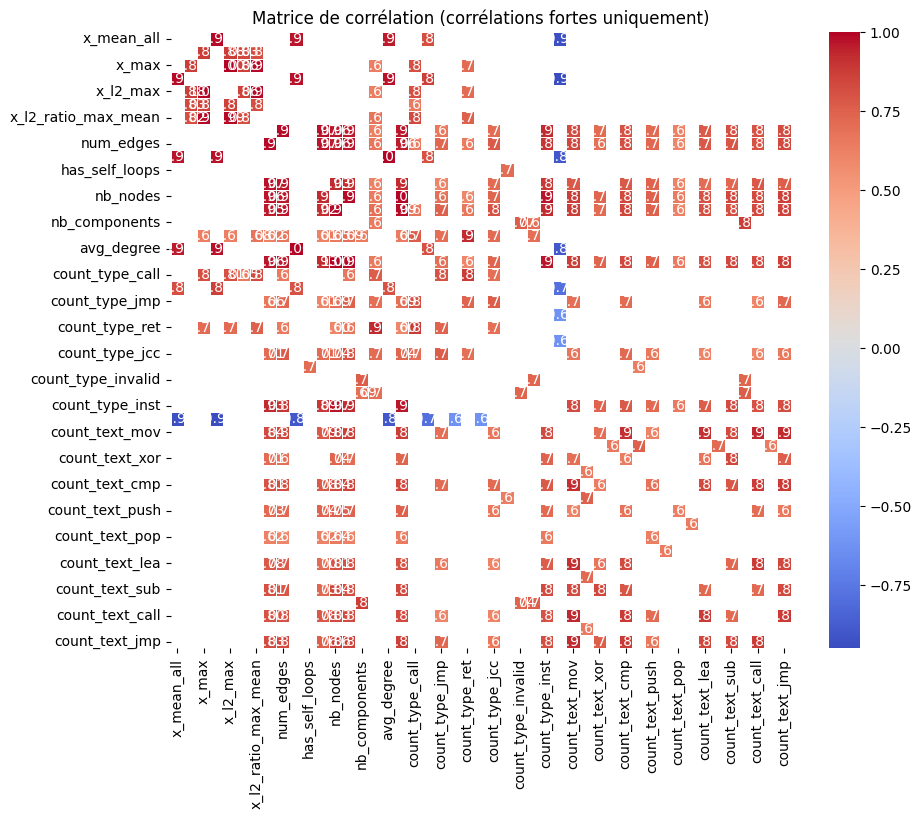

In [75]:
graph_no_id = graph.iloc[:, 1:]

corr_matrix = graph_no_id.corr()



# Filtrer les corrélations élevées
threshold = 0.6  # Ajuste selon ton besoin
strong_corr = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix != 1.0)].dropna(how="all", axis=0).dropna(how="all", axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(strong_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation (corrélations fortes uniquement)")
plt.show()

In [76]:
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor

def remove_high_vif(df, threshold=10):
    """
    Supprime les variables ayant un VIF supérieur au seuil spécifié.

    :param df: DataFrame contenant uniquement les variables numériques.
    :param threshold: Seuil au-delà duquel une variable est considérée comme redondante.
    :return: DataFrame nettoyé et liste des variables supprimées.
    """
    df = df.copy()  # Éviter de modifier l'original
    dropped = []

    while True:
        vif = pd.DataFrame()
        vif["Feature"] = df.columns
        vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

        max_vif = vif["VIF"].max()
        if max_vif < threshold:
            break  # Arrêter si toutes les variables ont un VIF inférieur au seuil

        # Supprimer la variable avec le plus grand VIF
        feature_to_drop = vif.loc[vif["VIF"].idxmax(), "Feature"]
        df = df.drop(columns=[feature_to_drop])
        dropped.append(feature_to_drop)

    return df, dropped

# Séparer l'ID et les autres variables
graph_id = graph.iloc[:, 0]  # Supposons que l'ID est la première colonne
data = graph.iloc[:, 1:]  # Toutes les autres colonnes

# Appliquer la suppression des variables redondantes
graph_vif_cleaned, removed_columns = remove_high_vif(data)

# Réintégrer l'ID
graph_vif_cleaned.insert(0, graph_id.name, graph_id)

print(f"Variables supprimées : {removed_columns}")

Variables supprimées : ['x_max', 'in_degree_mean', 'nb_nodes', 'count_inst', 'num_edges', 'prop_inst', 'x_l2_mean', 'nb_edges', 'avg_degree', 'nb_exit_nodes', 'x_mean_all', 'x_l2_max', 'num_nodes', 'count_text_mov', 'count_type_inst', 'count_type_call', 'count_text_call', 'x_l2_ratio_max_mean', 'prop_text_mov', 'prop_type_jcc', 'x_l2_std', 'count_text_jmp']


In [77]:
graph_vif_cleaned.head()

,graph_id,x_var_all,has_self_loops,num_connected_components,density,nb_components,max_path_len,prop_type_call,count_type_jmp,prop_type_jmp,...,count_text_lea,prop_text_lea,count_text_sub,prop_text_sub,count_text_loop,prop_text_loop,count_text_syscall,prop_text_syscall,prop_text_call,prop_text_jmp
0,000288eb820d08011f1f5a379d3ac38e3a4bf679777c2f...,0.278169,1,716,0.001408,1,-1,0.242806,230,0.206835,...,35,0.031475,70,0.062950,0,0.000000,0,0.0,0.042266,0.089029
1,000299f0baee15daa295b45083f32f0183c25948efdb88...,0.165098,1,37,0.009511,2,-1,0.037267,21,0.130435,...,7,0.043478,13,0.080745,1,0.006211,0,0.0,0.006211,0.024845
2,000fb3d9d92288bea9be95690b2ebea3e8d15c959ea598...,0.163686,1,749,0.001295,26,-1,0.099710,50,0.048403,...,10,0.009681,52,0.050339,1,0.000968,0,0.0,0.017425,0.027106
3,00adbcb3d7178fd7f60a3406c35c6b9acb459c9f77e42c...,0.071609,0,2751,0.000415,1,-1,0.000714,1,0.000357,...,1,0.000357,11,0.003927,4,0.001428,0,0.0,0.000714,0.000357
4,08cb8f5edd14ceb95b720095c998d3c5e98a57f9ced820...,1.521039,1,8108,0.000159,12,-1,0.302300,1105,0.110500,...,668,0.066800,205,0.020500,0,0.000000,0,0.0,0.073100,0.024300


In [78]:
# Recalculer le VIF sur le DataFrame nettoyé (sans l'ID)
graph_vif_cleaned_no_id = graph_vif_cleaned.iloc[:, 1:]  # Suppression de l'ID

vif_final = pd.DataFrame()
vif_final["Feature"] = graph_vif_cleaned_no_id.columns
vif_final["VIF"] = [variance_inflation_factor(graph_vif_cleaned_no_id.values, i) for i in range(graph_vif_cleaned_no_id.shape[1])]

print(vif_final)

                     Feature       VIF
0                  x_var_all  1.586012
1             has_self_loops  6.330704
2   num_connected_components  7.931947
3                    density  1.183460
4              nb_components  7.144567
5               max_path_len  1.147835
6             prop_type_call  4.260199
7             count_type_jmp  5.930664
8              prop_type_jmp  4.764636
9             count_type_ret  5.161463
10             prop_type_ret  3.868632
11            count_type_jcc  6.094940
12        count_type_invalid  4.170891
13         prop_type_invalid  1.686084
14            count_type_hlt  5.034118
15             prop_type_hlt  2.399213
16            prop_type_inst  4.798557
17            count_text_add  1.818697
18             prop_text_add  2.444067
19            count_text_xor  4.954190
20             prop_text_xor  4.980346
21            count_text_cmp  8.243781
22             prop_text_cmp  6.211643
23           count_text_push  3.998511
24            prop_text_p

In [113]:
graph_vif_cleaned.columns

Index(['graph_id', 'x_var_all', 'has_self_loops', 'num_connected_components',
       'density', 'nb_components', 'max_path_len', 'prop_type_call',
       'count_type_jmp', 'prop_type_jmp', 'count_type_ret', 'prop_type_ret',
       'count_type_jcc', 'count_type_invalid', 'prop_type_invalid',
       'count_type_hlt', 'prop_type_hlt', 'prop_type_inst', 'count_text_add',
       'prop_text_add', 'count_text_xor', 'prop_text_xor', 'count_text_cmp',
       'prop_text_cmp', 'count_text_push', 'prop_text_push', 'count_text_pop',
       'prop_text_pop', 'count_text_lea', 'prop_text_lea', 'count_text_sub',
       'prop_text_sub', 'count_text_loop', 'prop_text_loop',
       'count_text_syscall', 'prop_text_syscall', 'prop_text_call',
       'prop_text_jmp'],
      dtype='object')

In [115]:
# Ratios et interactions entre types d’instructions
graph_vif_cleaned['ratio_calls_jumps'] = graph_vif_cleaned['prop_type_call'] / (graph_vif_cleaned['prop_type_jmp'] + 1e-6)
graph_vif_cleaned['ratio_returns_calls'] = graph_vif_cleaned['prop_type_ret'] / (graph_vif_cleaned['prop_type_call'] + 1e-6)
graph_vif_cleaned['ratio_invalid_inst'] = graph_vif_cleaned['prop_type_invalid'] / (graph_vif_cleaned['prop_type_inst'] + 1e-6)
graph_vif_cleaned['ratio_syscalls_calls'] = graph_vif_cleaned['prop_text_syscall'] / (graph_vif_cleaned['prop_text_call'] + 1e-6)
graph_vif_cleaned['ratio_push_pop'] = graph_vif_cleaned['count_text_push'] / (graph_vif_cleaned['count_text_pop'] + 1e-6)


# Statistiques sur la structure du graphe
graph_vif_cleaned['graph_compactness'] = graph_vif_cleaned['density'] / (graph_vif_cleaned['nb_components'] + 1e-6)
graph_vif_cleaned['avg_path_len'] = graph_vif_cleaned['max_path_len'] / (graph_vif_cleaned['nb_components'] + 1e-6)
graph_vif_cleaned['self_loop_ratio'] = graph_vif_cleaned['has_self_loops'] / (graph_vif_cleaned['nb_components'] + 1e-6)
graph_vif_cleaned['normalized_density'] = graph_vif_cleaned['density'] / (graph_vif_cleaned['num_connected_components'] + 1e-6)

# Transformations non linéaires
graph_vif_cleaned['log_density'] = np.log(graph_vif_cleaned['density'] + 1e-6)
graph_vif_cleaned['sqrt_max_path_len'] = np.sqrt(graph_vif_cleaned['max_path_len'])
graph_vif_cleaned['log_count_text_cmp'] = np.log(graph_vif_cleaned['count_text_cmp'] + 1e-6)
graph_vif_cleaned['inv_prop_text_sub'] = 1 / (graph_vif_cleaned['prop_text_sub'] + 1e-6)

# Scores de complexité
graph_vif_cleaned['complexity_score'] = graph_vif_cleaned['max_path_len'] * graph_vif_cleaned['density']
graph_vif_cleaned['instruction_entropy'] = -(graph_vif_cleaned['prop_text_add'] * np.log(graph_vif_cleaned['prop_text_add'] + 1e-6) + 
                                               graph_vif_cleaned['prop_text_xor'] * np.log(graph_vif_cleaned['prop_text_xor'] + 1e-6) + 
                                               graph_vif_cleaned['prop_text_cmp'] * np.log(graph_vif_cleaned['prop_text_cmp'] + 1e-6))
graph_vif_cleaned['flow_complexity'] = (graph_vif_cleaned['prop_text_call'] + graph_vif_cleaned['prop_text_jmp'] + graph_vif_cleaned['prop_text_loop']) * graph_vif_cleaned['max_path_len']

C:\Users\E824899\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [116]:
folder_path = r"C:\Users\E824899\Desktop\SDC\ZIP_Pierre\training_set_metadata.csv"
metadata = pd.read_csv(folder_path, sep=";")
metadata.head()

,name,64-bit execution via heavens gate,64bits,PEB access,accept command line arguments,access the Windows event log,act as TCP client,allocate RW memory,allocate RWX memory,allocate memory,...,winzip,wise,worm,write and execute a file,write clipboard data,write file on Linux,write file on Windows,write pipe,xorcrypt,yoda
0,9fbf213113ba0a18dc2642f83b1201541428fd7951d6a8...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1b35c9dbf3cd9ac60015aaa6cd451c898defa6dac1ff43...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,bf8d307a136a936f7338c1f2eec773c4eb1c802cab77da...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1e51933903f0358c0b635f863368eb15a61cd3442bc5bf...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8a6503fe68d699f8a31531c157e9da931192cd7e3ec809...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23102 entries, 0 to 23101
Columns: 454 entries, name to yoda
dtypes: int64(453), object(1)
memory usage: 80.0+ MB


In [118]:
#import données graph test

folder_path = "test.csv"
graph_test = pd.read_csv(folder_path)
graph_test.head()

,graph_id,nb_nodes,nb_edges,nb_components,nb_exit_nodes,max_path_len,avg_degree,count_inst,prop_inst,count_type_call,...,count_text_sub,prop_text_sub,count_text_loop,prop_text_loop,count_text_syscall,prop_text_syscall,count_text_call,prop_text_call,count_text_jmp,prop_text_jmp
0,8c922a4c3ec60665b4bd544cd0e9804cd7fe6371074fac...,17729,28022,14,1404,-1,1.580574,17729,1.0,4851,...,383,0.021603,0,0.000000,0,0.0,815,0.045970,449,0.025326
1,aa2f32e3e044224037e05ee6fcd748f038ddd1c3c547cb...,17539,26096,75,1718,-1,1.487884,17539,1.0,3554,...,495,0.028223,3,0.000171,0,0.0,531,0.030275,1302,0.074235
2,aa5113b290cbc631688be97fab7645fb3aec16092afc64...,12847,21201,4,680,-1,1.650269,12847,1.0,4295,...,271,0.021094,0,0.000000,0,0.0,833,0.064840,205,0.015957
3,aa53b0e0d2e82baf6d92923eaf454a4c8bdbea8541ae45...,486,562,40,126,-1,1.156379,486,1.0,12,...,18,0.037037,5,0.010288,0,0.0,2,0.004115,7,0.014403
4,aa6017aaceada602ee43748bb37612a6b815c8894609dc...,28655,46223,5,3879,-1,1.613087,28655,1.0,15305,...,0,0.000000,0,0.000000,0,0.0,0,0.000000,0,0.000000


In [119]:
graph_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   graph_id            2997 non-null   object 
 1   nb_nodes            2997 non-null   int64  
 2   nb_edges            2997 non-null   int64  
 3   nb_components       2997 non-null   int64  
 4   nb_exit_nodes       2997 non-null   int64  
 5   max_path_len        2997 non-null   int64  
 6   avg_degree          2997 non-null   float64
 7   count_inst          2997 non-null   int64  
 8   prop_inst           2997 non-null   float64
 9   count_type_call     2997 non-null   int64  
 10  prop_type_call      2997 non-null   float64
 11  count_type_jmp      2997 non-null   int64  
 12  prop_type_jmp       2997 non-null   float64
 13  count_type_ret      2997 non-null   int64  
 14  prop_type_ret       2997 non-null   float64
 15  count_type_jcc      2997 non-null   int64  
 16  prop_t

In [120]:
test = pd.read_csv('test_features_batch_1.csv')
test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   graph_id                  2997 non-null   object 
 1   feature_dim               2997 non-null   int64  
 2   x_mean_all                2997 non-null   float64
 3   x_var_all                 2997 non-null   float64
 4   x_abs_mean                2997 non-null   float64
 5   x_max                     2997 non-null   float64
 6   x_min                     2997 non-null   float64
 7   x_l2_mean                 2997 non-null   float64
 8   x_l2_max                  2997 non-null   float64
 9   x_l2_min                  2997 non-null   float64
 10  x_l2_std                  2997 non-null   float64
 11  x_l2_ratio_max_mean       2997 non-null   float64
 12  num_nodes_l2_above_1      2997 non-null   int64  
 13  num_nodes_l2_below_0.1    2997 non-null   int64  
 14  num_node

In [121]:
graph_test = test.merge(graph_test, on="graph_id", how="inner")

graph_test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   graph_id                  2997 non-null   object 
 1   feature_dim               2997 non-null   int64  
 2   x_mean_all                2997 non-null   float64
 3   x_var_all                 2997 non-null   float64
 4   x_abs_mean                2997 non-null   float64
 5   x_max                     2997 non-null   float64
 6   x_min                     2997 non-null   float64
 7   x_l2_mean                 2997 non-null   float64
 8   x_l2_max                  2997 non-null   float64
 9   x_l2_min                  2997 non-null   float64
 10  x_l2_std                  2997 non-null   float64
 11  x_l2_ratio_max_mean       2997 non-null   float64
 12  num_nodes_l2_above_1      2997 non-null   int64  
 13  num_nodes_l2_below_0.1    2997 non-null   int64  
 14  num_node

In [122]:
graph_test = graph_test.drop(columns=['x_abs_mean', 'num_nodes_l2_above_1', 'out_degree_mean', 'feature_dim', 'x_min', 'x_l2_min', 'num_nodes_l2_below_0.1'])


# Trouver les colonnes dupliquées
duplicates = find_duplicate_columns(graph_test)
print(duplicates)



{}


In [124]:
import numpy as np

# Ratios et interactions entre types d’instructions
graph_test['ratio_calls_jumps'] = graph_test['prop_type_call'] / (graph_test['prop_type_jmp'] + 1e-6)
graph_test['ratio_returns_calls'] = graph_test['prop_type_ret'] / (graph_test['prop_type_call'] + 1e-6)
graph_test['ratio_invalid_inst'] = graph_test['prop_type_invalid'] / (graph_test['prop_type_inst'] + 1e-6)
graph_test['ratio_syscalls_calls'] = graph_test['prop_text_syscall'] / (graph_test['prop_text_call'] + 1e-6)
graph_test['ratio_push_pop'] = graph_test['count_text_push'] / (graph_test['count_text_pop'] + 1e-6)


# Statistiques sur la structure du graphe
graph_test['graph_compactness'] = graph_test['density'] / (graph_test['nb_components'] + 1e-6)
graph_test['avg_path_len'] = graph_test['max_path_len'] / (graph_test['nb_components'] + 1e-6)
graph_test['self_loop_ratio'] = graph_test['has_self_loops'] / (graph_test['nb_components'] + 1e-6)
graph_test['normalized_density'] = graph_test['density'] / (graph_test['num_connected_components'] + 1e-6)

# Transformations non linéaires
graph_test['log_density'] = np.log(graph_test['density'] + 1e-6)
graph_test['sqrt_max_path_len'] = np.sqrt(graph_test['max_path_len'])
graph_test['log_count_text_cmp'] = np.log(graph_test['count_text_cmp'] + 1e-6)
graph_test['inv_prop_text_sub'] = 1 / (graph_test['prop_text_sub'] + 1e-6)

# Scores de complexité
graph_test['complexity_score'] = graph_test['max_path_len'] * graph_test['density']
graph_test['instruction_entropy'] = -(graph_test['prop_text_add'] * np.log(graph_test['prop_text_add'] + 1e-6) + 
                                      graph_test['prop_text_xor'] * np.log(graph_test['prop_text_xor'] + 1e-6) + 
                                      graph_test['prop_text_cmp'] * np.log(graph_test['prop_text_cmp'] + 1e-6))
graph_test['flow_complexity'] = (graph_test['prop_text_call'] + graph_test['prop_text_jmp'] + graph_test['prop_text_loop']) * graph_test['max_path_len']


C:\Users\E824899\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [125]:
#import csv a prédire

folder_path = r"C:\Users\E824899\Desktop\SDC\ZIP_Pierre\test_set_metadata_to_predict.xlsx"
csv_test = pd.read_excel(folder_path)
csv_test.head()

,name,64-bit execution via heavens gate,64bits,PEB access,accept command line arguments,access the Windows event log,act as TCP client,allocate RW memory,allocate RWX memory,allocate memory,...,winzip,wise,worm,write and execute a file,write clipboard data,write file on Linux,write file on Windows,write pipe,xorcrypt,yoda
0,95ff2b3fd399984950293194a717d404bc4e9e3aa0296f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4216c07609bb5b89f32d9b559494848a0f5411d1e2d3cf...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2518f84c015a5795bdb2597d580ab7df8e0bfa4b6543c6...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,243268c658456d9b8ec968c088c4f3c7cb976df92a4b99...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,533c09cb9b49c10494337d3eb7d2919c2c656b37f554fb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# Fusion des données d'entraînement sur 'name'
train_data = graph_vif_cleaned.merge(metadata, left_on="graph_id", right_on="name", how="inner")  #ici pour utiliser VIF : graph_vif_cleaned (untruc comme ca)
X_train = train_data.drop(columns=['name', 'graph_id'] + list(metadata.columns[1:]))  # Features
Y_train = train_data[metadata.columns[1:]]  # Labels binaires

In [127]:
# Fusion des données de test
test_data = graph_test.merge(csv_test, left_on="graph_id", right_on="name", how="inner")  # CSV test est vide
X_test = test_data.drop(columns=['name', 'graph_id'])

In [128]:
X_train.tail()

,x_var_all,has_self_loops,num_connected_components,density,nb_components,max_path_len,prop_type_call,count_type_jmp,prop_type_jmp,count_type_ret,...,avg_path_len,self_loop_ratio,normalized_density,log_density,sqrt_max_path_len,log_count_text_cmp,inv_prop_text_sub,complexity_score,instruction_entropy,flow_complexity
22395,0.440640,0,75293,0.000012,36,-1,0.069961,2458,0.026310,1324,...,-0.027778,0.000000,1.649239e-10,-11.218942,NaN,8.825413,30.174477,-0.000012,0.415879,-0.096272
22396,0.692392,1,9877,0.000126,11,-1,0.276577,1444,0.115161,918,...,-0.090909,0.090909,1.279042e-08,-8.968721,NaN,6.906755,66.339514,-0.000126,0.498007,-0.075365
22397,26.024734,1,5309,0.000268,7,-1,0.406918,1026,0.178342,409,...,-0.142857,0.142857,5.039803e-08,-8.222425,NaN,4.543295,191.729899,-0.000268,0.434086,-0.121676
22398,0.694468,1,954,0.000900,52,-1,0.066205,517,0.397998,194,...,-0.019231,0.019231,9.430905e-07,-7.012329,NaN,4.762174,15.282119,-0.000900,0.332560,-0.040801
22399,0.052717,0,345,0.002873,4,254,0.002899,0,0.000000,2,...,63.499984,0.000000,8.328327e-06,-5.851956,15.937377,2.079442,114.986777,0.729811,0.372069,0.736232


In [129]:
X_test.tail()

,x_mean_all,x_var_all,x_max,x_l2_mean,x_l2_max,x_l2_std,x_l2_ratio_max_mean,num_nodes,num_edges,in_degree_mean,...,winzip,wise,worm,write and execute a file,write clipboard data,write file on Linux,write file on Windows,write pipe,xorcrypt,yoda
2992,0.070592,3.374527,715.0,2.449846,715.000671,12.226954,291.855260,3422,5287,1.545003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2993,0.071351,2.013228,1376.0,2.456861,1376.000366,9.317177,560.064216,25877,41552,1.605750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2994,0.071511,1.386135,1356.0,2.467415,1356.000366,7.609889,549.563015,52179,83786,1.605742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2995,0.050464,0.312442,807.0,1.691104,807.000610,3.410235,477.203088,159986,181867,1.136768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,0.050672,1.948603,2958.0,1.704353,2958.000244,9.319314,1735.555106,142225,162685,1.143857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# Supposons que X_train ait les bonnes colonnes après le VIF
selected_columns = X_train.columns  # Liste des colonnes utilisées après la sélection

# Appliquer cette sélection sur le jeu de test
X_test = X_test[selected_columns]

In [131]:
X_test.head()

,x_var_all,has_self_loops,num_connected_components,density,nb_components,max_path_len,prop_type_call,count_type_jmp,prop_type_jmp,count_type_ret,...,avg_path_len,self_loop_ratio,normalized_density,log_density,sqrt_max_path_len,log_count_text_cmp,inv_prop_text_sub,complexity_score,instruction_entropy,flow_complexity
0,77.648872,0,14618,0.000093,35,-1,0.579510,883,0.052748,2719,...,-0.028571,0.000000,6.385551e-09,-9.268563,NaN,-13.815511,1000000.000000,-0.000093,0.000000,-0.000000
1,0.066450,0,102,0.004936,4,-1,0.022124,7,0.030973,5,...,-0.250000,0.000000,4.839300e-05,-5.310980,NaN,1.791760,14.124800,-0.004936,0.368291,-0.057522
2,0.310846,0,187564,0.000008,7,-1,0.006765,10,0.000053,4,...,-0.142857,0.000000,4.480459e-11,-11.574404,NaN,1.791760,26099.422449,-0.000008,0.006133,-0.000080
3,1.794969,1,1921,0.000650,1,-1,0.361089,376,0.146304,94,...,-0.999999,0.999999,3.384826e-07,-7.336655,NaN,5.416100,15.481688,-0.000650,0.380166,-0.070428
4,0.322171,0,202,0.006585,1,-1,0.327354,28,0.125561,32,...,-0.999999,0.000000,3.259931e-05,-5.022800,NaN,2.708050,222.950282,-0.006585,0.466623,-0.112108


In [132]:
X_test.isna().sum().sum()

np.int64(2952)

In [133]:
Y_train.tail()

,64-bit execution via heavens gate,64bits,PEB access,accept command line arguments,access the Windows event log,act as TCP client,allocate RW memory,allocate RWX memory,allocate memory,allocate or change RW memory,...,winzip,wise,worm,write and execute a file,write clipboard data,write file on Linux,write file on Windows,write pipe,xorcrypt,yoda
22395,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22396,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22397,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22398,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
print(Y_train.isna().sum().sum())  # Doit être 0
print(Y_train.nunique().value_counts())

0
2    452
1      1
Name: count, dtype: int64


In [135]:
cols_utiles = Y_train.columns[Y_train.nunique() > 1]  # 423 colonnes utiles
Y_train_reduit = Y_train[cols_utiles]

In [136]:
Y_train_reduit.head()

,64-bit execution via heavens gate,64bits,PEB access,accept command line arguments,access the Windows event log,act as TCP client,allocate RW memory,allocate RWX memory,allocate memory,allocate or change RW memory,...,winzip,wise,worm,write and execute a file,write clipboard data,write file on Linux,write file on Windows,write pipe,xorcrypt,yoda
0,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [138]:
# Liste des graph_id à exclure
ids_a_supprimer = [
    'ba9b5ee8f7dfdef785d87a9884bed1ab10aee870e415ed9263454143a227c557',
    'cf0a36610c4e55d8e12493a810cabd97b236c4966f0e0e2d53f44b24edd402ae',
    'd536afd4f31af314ce3a9bbd2f12be6cbdcbd1f4432df5b44ca0ac32cfbf2fad',
    'd759b44ef4b0e86c75b73383138d578029997f5458f287049f6c3e7d8b5852b9',
    'f028f6c1a59e54652724775ed741f27601c5be955ada35d787e43b01851b9b5c',
    'f614a98a634cdd99bf0945c65ce041f891da4fb4f0aeee6e59397347793ab8a7',
    '0f348671f312ec237fc564bb19a1a726a2b9953462c09c19a3a3fb806b653dbd',
    '18267ba674c43afdac396f36c463a5d452b970d1d1587ff7deb9519361032a51',
    '189b2c1eee77be80ec244ef2217ebd75b189a9586bd17f7a8c02838b00bbd3ca',
    '24a03abe256526445082743bf8e743e83a6ae6a8e18d8205cf058f66c7614a5f',
    '3982cfb65ba487cec756b2a339f3bed97d60bf49004dc5da75c250a8fda09fff',
    '3bf0ec21f7b4ec29031d614fe3336188d76849ff3eac4b5d01b7b11b3c8eddef',
    '5898fc2b99ef703858c7bd86e5762ba1daa2db48a2222c60f5b15d70c9ee2b69',
    '6280877cc578a5a5c95c1401447a79b6108afb5b3adc5357c3195c48404a7dcf',
    '71cb2bbd36782f21a1444291fb90cd36120b16e9656a6fbfccd2781375858b51',
    '7d57f06c9413e1a6211686f5b30013a6b7b4bf13736241202ffeae1a8c936f4b',
    '817d2be09ed6d0496135d54016b6419ee4ad53ce929ad806f8159801ab09caf3',
    '8652e149c98b0811e65d9da9e0e6bb3e412b0f211b95e61ce6759f75426a4644',
    '8cbe77aaed72dff9f87eafd87ade3aff2059b537b3903bd25b47d7fdaf2c898a',
    '8cfcd9eba58d7488f34fd19c00e5a7ef6041f8e6c2024e420e5f5b8b34667a9c',
    '990729d7930dcde22c797f88caadb2b3a3c0f38da499fa20bccf94f41eb0fc2c',
    '99fd9e75e6241eff30e01c5b59df9e901fb24d12bee89c069cc6158f78b3cc98',
    '9bde8d342290b5c22bc98b462ffbbe9e765d689f690ee4774382840f172f6731'
]

# Suppression dans X_train et Y_train_reduit
X_train = X_train[~X_train.index.isin(ids_a_supprimer)]
Y_train_reduit = Y_train_reduit.loc[X_train.index]

In [139]:
Y_train_reduit.isna().sum()

64-bit execution via heavens gate    0
64bits                               0
PEB access                           0
accept command line arguments        0
access the Windows event log         0
                                    ..
write file on Linux                  0
write file on Windows                0
write pipe                           0
xorcrypt                             0
yoda                                 0
Length: 452, dtype: int64

In [140]:
print(np.unique(Y_train_reduit))

[0 1]


In [141]:
print(Y_train_reduit.isna().sum().sum())

0


In [142]:
Y_train_reduit = Y_train_reduit.astype(int)

In [143]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
import pandas as pd

# Initialisation du modèle XGBoost
xgb = XGBClassifier(
    n_estimators=800,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    base_score=0.5
)

# Enveloppe MultiOutput
multi_xgb = MultiOutputClassifier(xgb, n_jobs=-1)

# Cross-validator (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Variables pour stocker les résultats
test_probs = []

for fold, (train_index, val_index) in enumerate(cv.split(X_train)):
    print(f"\n🧪 Fold {fold + 1}")

    # Division des données en train et validation pour chaque fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    Y_train_fold, Y_val_fold = Y_train_reduit.iloc[train_index], Y_train_reduit.iloc[val_index]

    # Entraînement du modèle sur chaque fold
    multi_xgb.fit(X_train_fold, Y_train_fold)

    # Prédictions des probabilités sur le test set (liste de tableaux)
    Y_test_proba_list = multi_xgb.predict_proba(X_test)

    # Conversion des prédictions en array pour appliquer le threshold (seulement P(y=1))
    Y_test_proba = np.array([proba[:, 1] for proba in Y_test_proba_list]).T

    # Stockage des probabilités pour le test set
    test_probs.append(Y_test_proba)

# 🔁 Moyenne des probabilités sur les 5 folds
avg_test_proba = np.mean(test_probs, axis=0)



# 🔮 Application du threshold de 0.2
threshold = 0.2
Y_pred_reduit = (avg_test_proba >= threshold).astype(int)



🧪 Fold 1

🧪 Fold 2

🧪 Fold 3

🧪 Fold 4

🧪 Fold 5


In [144]:
# Création d'un DataFrame rempli de 0 avec toutes les colonnes originales
Y_pred_df = pd.DataFrame(0, columns=Y_train.columns, index=range(len(X_test)))

# Remplir les 423 colonnes utiles avec les vraies prédictions
Y_pred_df[cols_utiles] = Y_pred_reduit

In [145]:
Y_pred_df.insert(0, 'name', test_data['name'])





 # Ajouter l'identifiant des binaires
Y_pred_df.to_excel("CC.xlsx", index=False)

C:\Users\E824899\AppData\Local\Temp\1\ipykernel_29164\2515868516.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Y_pred_df.insert(0, 'name', test_data['name'])


In [146]:
# Charger les deux fichiers Excel
predictions_df = pd.read_excel("CC.xlsx")
ids_df = pd.read_excel("xgb_1_predictions.xlsx")  # Supposons que ce fichier contient les IDs dans la colonne 'id'

# Trier predictions_df selon l'ordre des IDs dans ids_df
# On suppose que 'name' dans predictions_df et 'id' dans ids_df sont les colonnes à utiliser pour l'alignement
sorted_predictions_df = predictions_df.set_index('name').reindex(ids_df['name']).reset_index()

# Remplir les valeurs manquantes (les IDs qui ne sont pas présents dans predictions_df) avec des zéros
sorted_predictions_df.fillna(0, inplace=True)

# Sauvegarder le DataFrame trié en Excel
sorted_predictions_df.to_excel("fou2busOG.xlsx", index=False)

In [147]:


# Liste des hash à marquer
target_hashes = {
    "e95ee48cdeea99e4d56f3325e220a0e7274dd65bf5ef9e3028ecb628b1e86166",
    "d873e0097be4144f1b23e3d932587a18d5600d8d64071d53763d27cafe58f8e8",
    "56942bae98643d92b1036edd5e882147efc4a29690a41d457a68ad32f9cc992c"
}

# Charger le fichier Excel
df = pd.read_excel("fou2busOG.xlsx")  # Remplace par le bon nom

# Nom de la colonne contenant les hash
hash_col = "name"  # Remplace si ta colonne s'appelle différemment

df.loc[df[hash_col].isin(target_hashes), "peexe"] = 1

# Sauvegarder le fichier modifié
df.to_excel("buSSZ.xlsx", index=False)